In [1]:
import keras
import numpy as np

train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))

    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [6]:
# 用 Keras 內建方法檢視模型各層參數量
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.9002 - accuracy: 0.3030 - val_loss: 1.7124 - val_accuracy: 0.3824
Epoch 2/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.7015 - accuracy: 0.3877 - val_loss: 1.6596 - val_accuracy: 0.4105
Epoch 3/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.6081 - accuracy: 0.4265 - val_loss: 1.6076 - val_accuracy: 0.4212
Epoch 4/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.5547 - accuracy: 0.4446 - val_loss: 1.5344 - val_accuracy: 0.4528
Epoch 5/100
50000/50000 [==============================] - 2s 31us/step - loss: 1.5022 - accuracy: 0.4614 - val_loss: 1.5566 - val_accuracy: 0.4512
Epoch 6/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.4675 - accuracy: 0.4767 - val_loss: 1.4956 - val_accuracy: 0.4708
Epoch 7/100
50000/50000 [==============================] - 2s 

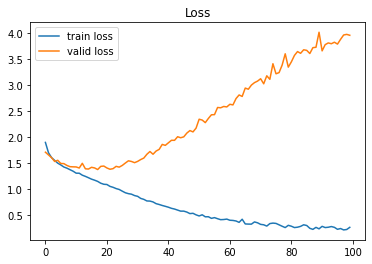

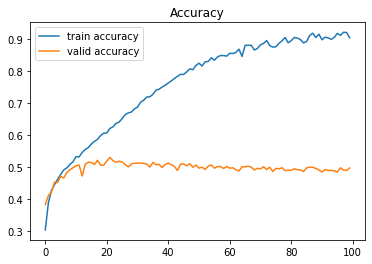

In [9]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()